In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [57]:
import numpy as np


In [58]:
X=[]
y=[]

with open('/content/gdrive/My Drive/movie_reviews.txt') as file:   
    for line in file:
      y.append(line.split()[-1]) 
      X.append(line.split()[:-1])

In [59]:
y=np.array(y).astype("int32")
print(len(X))

1000


In [60]:
X[0]

['A',
 'very',
 'very',
 'very',
 'slow-moving',
 'aimless',
 'movie',
 'about',
 'a',
 'distressed',
 'drifting',
 'young',
 'man']

In [61]:
k=750
X_train=X[:k]
X_test=X[k:]
Y_train=y[:k]
Y_test=y[k:]

In [62]:
print(len(X_test[0]))
print(len(X_train[0]))

8
13


In [63]:
neg=np.where(y==0)
neg=len(neg[0])
pos=len(X)-neg
pos

500

In [64]:
total_words_list={}
for i in X:
  total_words_list=set(i).union(set(total_words_list))      #finding the unique vocabluary
total_words_list=sorted(list(total_words_list))

## TFIDF

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    vocabulary=total_words_list,
    token_pattern=None) 

In [66]:
X_train=tfidf.fit_transform(X_train)

In [67]:
X_test=tfidf.transform(X_test)

In [68]:
from scipy.sparse import csr_matrix
X_train=csr_matrix.todense(X_train)
X_test=csr_matrix.todense(X_test)

In [69]:
from collections import Counter
import math

In [70]:

def TFIDF(features,X_train):
    total=np.zeros(len(features))  
    tf=[]
    for i in X_train:
        rowfre=dict(Counter(i))
       
        length=len(X_train)
        rowcount = dict.fromkeys(features, 0)
        k=0
        for word in rowfre:
            rowcount[word]=rowfre[word]   # computing no of words in each document
        
        for word in rowcount:
            if(rowcount[word]>0):
                total[k]+=1         # computing no of documents which contains word Wi and storing it in total
            k+=1
          
        rowtf=[]
        for word in rowcount:
            rowtf.append(rowcount[word]/length)    # computing tf values
        tf.append(rowtf)
      
   
    for j in range(len(features)):
            idf_=1+math.log((1+len(X_train))/float(1+total[j]))  #computing idf values
            idf.append(idf_)
    
    for i in range(len(X_train)):
        for j in range(len(features)):
            tf[i][j]*=idf[j]
    return(tf)
    
idf=[]    
tfidf=TFIDF(total_words_list,X)  


In [71]:
tfidf=np.array(tfidf)
tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00571153, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [72]:
print("idf values :\n",idf)

idf values :
 [7.215607598755275, 5.711530201979001, 7.215607598755275, 7.215607598755275, 4.730700948967275, 7.215607598755275, 6.810142490647111, 6.116995310087166, 7.215607598755275, 7.215607598755275, 5.269697449699962, 7.215607598755275, 6.52246041819533, 7.215607598755275, 7.215607598755275, 7.215607598755275, 7.215607598755275, 7.215607598755275, 7.215607598755275, 7.215607598755275, 7.215607598755275, 7.215607598755275, 7.215607598755275, 7.215607598755275, 7.215607598755275, 7.215607598755275, 6.29931686688112, 6.810142490647111, 7.215607598755275, 7.215607598755275, 7.215607598755275, 6.810142490647111, 6.810142490647111, 6.810142490647111, 6.810142490647111, 6.810142490647111, 7.215607598755275, 7.215607598755275, 7.215607598755275, 7.215607598755275, 7.215607598755275, 7.215607598755275, 6.810142490647111, 7.215607598755275, 7.215607598755275, 7.215607598755275, 6.810142490647111, 7.215607598755275, 7.215607598755275, 7.215607598755275, 7.215607598755275, 6.52246041819533, 

## PCA

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_train)
new_data=pca.transform(X_train)

In [74]:
new_test=pca.transform(X_test)

In [75]:
new_data.shape

(750, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

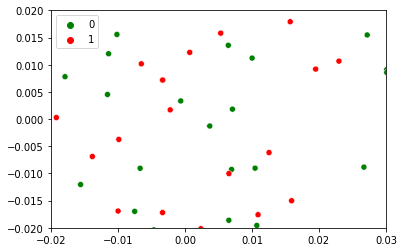

<Figure size 1080x1080 with 0 Axes>

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(new_data[:,0],new_data[:,1],hue=Y_train,palette=['green','red'])
plt.xlim(-0.02, 0.03)
plt.ylim(-0.02, 0.02)
plt.figure(figsize=(15,15))
plt.show

## SVM Linear


In [77]:
from sklearn import svm
from sklearn.metrics import classification_report
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
pred=classifier_linear.predict(X_train)
report = classification_report(Y_train, pred, output_dict=True)

In [79]:
report

{'0': {'f1-score': 0.9865361077111383,
  'precision': 0.9734299516908212,
  'recall': 1.0,
  'support': 403},
 '1': {'f1-score': 0.9838945827232796,
  'precision': 1.0,
  'recall': 0.968299711815562,
  'support': 347},
 'accuracy': 0.9853333333333333,
 'macro avg': {'f1-score': 0.985215345217209,
  'precision': 0.9867149758454106,
  'recall': 0.984149855907781,
  'support': 750},
 'weighted avg': {'f1-score': 0.9853139621500889,
  'precision': 0.9857230273752012,
  'recall': 0.9853333333333333,
  'support': 750}}

In [80]:
from sklearn.metrics import accuracy_score
a=accuracy_score(Y_train,pred)
print("train accuracy on linear kernel=",a)
pred=classifier_linear.predict(X_test)

a=accuracy_score(Y_test,pred)
print("test accuracy on linear kernel=",a)

train accuracy on linear kernel= 0.9853333333333333
test accuracy on linear kernel= 0.748


In [81]:
print("no of support vectors :",classifier_linear.n_support_)

no of support vectors : [343 317]


## SVM Polynomial


In [82]:
from sklearn import svm
from sklearn.metrics import classification_report
classifier_linear = svm.SVC(kernel='poly')
classifier_linear.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
pred=classifier_linear.predict(X_train)
report = classification_report(Y_train, pred, output_dict=True)

In [84]:
report

{'0': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 403},
 '1': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 347},
 'accuracy': 1.0,
 'macro avg': {'f1-score': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'support': 750},
 'weighted avg': {'f1-score': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'support': 750}}

In [85]:
print('positive: ', report['0'])
print('negative: ', report['1'])

positive:  {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 403}
negative:  {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 347}


In [86]:
a=accuracy_score(Y_train,pred)
print("train accuracy on polynomial kernel=",a)
pred=classifier_linear.predict(X_test)

a=accuracy_score(Y_test,pred)
print("test accuracy on polynomial kernel=",a)

train accuracy on polynomial kernel= 1.0
test accuracy on polynomial kernel= 0.412


In [87]:
print("no of support vectors :",classifier_linear.n_support_)

no of support vectors : [402 346]


## SVM Radial


In [88]:
from sklearn import svm
from sklearn.metrics import classification_report
classifier_linear = svm.SVC(kernel='rbf')
classifier_linear.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
pred=classifier_linear.predict(X_train)
report = classification_report(Y_train, pred, output_dict=True)

In [90]:
report

{'0': {'f1-score': 0.9987608426270136,
  'precision': 0.9975247524752475,
  'recall': 1.0,
  'support': 403},
 '1': {'f1-score': 0.9985569985569985,
  'precision': 1.0,
  'recall': 0.9971181556195965,
  'support': 347},
 'accuracy': 0.9986666666666667,
 'macro avg': {'f1-score': 0.998658920592006,
  'precision': 0.9987623762376238,
  'recall': 0.9985590778097982,
  'support': 750},
 'weighted avg': {'f1-score': 0.99866653077062,
  'precision': 0.9986699669966995,
  'recall': 0.9986666666666667,
  'support': 750}}

In [91]:
a=accuracy_score(Y_train,pred)
print("train accuracy on radial kernel=",a)

pred=classifier_linear.predict(X_test)
a=accuracy_score(Y_test,pred)
print("test accuracy on radial kernel=",a)

train accuracy on radial kernel= 0.9986666666666667
test accuracy on radial kernel= 0.688


In [92]:
print("no of support vectors :",classifier_linear.n_support_)

no of support vectors : [395 344]
